# Laboratorio 6 SDS 20498

### Gabriel Alejandro Vicente Lorenzo 20498

### Preámbulo
1. Instale la librería scapy: https://scapy.net/
2. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asignelos a una variable.
3. Imprima el tipo de variable, la longitud y el contenido del variable.
4. Imprima el tipo de dato del primer paquete capturado.
5. Imprima el contenido de 5 paquetes.

In [1]:
from scapy.all import *

# Capturar 25 paquetes de la red doméstica
paquetes = sniff(count=25)

# Imprimir información sobre la variable 'paquetes'
print("Tipo de variable:", type(paquetes))
print("Longitud de la variable:", len(paquetes))
print("Contenido de la variable:", paquetes)

# Imprimir el tipo de dato del primer paquete capturado
primer_paquete = paquetes[0]
print("\nTipo de dato del primer paquete capturado:", type(primer_paquete))

# Imprimir el contenido de 5 paquetes
print("\nContenido de 5 paquetes:")
for i in range(5):
    print(f"Paquete {i+1}:\n{paquetes[i]}\n")


Tipo de variable: <class 'scapy.plist.PacketList'>
Longitud de la variable: 25
Contenido de la variable: <Sniffed: TCP:9 UDP:16 ICMP:0 Other:0>

Tipo de dato del primer paquete capturado: <class 'scapy.layers.l2.Ether'>

Contenido de 5 paquetes:
Paquete 1:
Ether / IP / TCP 192.168.1.14:29607 > 104.46.162.224:https PA / Raw

Paquete 2:
Ether / IP / TCP 192.168.1.14:29607 > 104.46.162.224:https A / Raw

Paquete 3:
Ether / IP / TCP 192.168.1.14:29607 > 104.46.162.224:https A / Raw

Paquete 4:
Ether / IP / TCP 192.168.1.14:29607 > 104.46.162.224:https A / Raw

Paquete 5:
Ether / IP / TCP 192.168.1.14:29607 > 104.46.162.224:https PA / Raw



### Análisis estadístico
1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
2. Convierta la variable a un DataFrame.
3. Muestre el contenido de las primeras 5 filas del dataset.
4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.

In [2]:
import pandas as pd
from scapy.all import rdpcap, IP, TCP, UDP, Raw

# Paso 1: Cargar el archivo .pcap y asignarlo a una variable
archivo_pcap = "../analisis_paquetes.pcap"

# Paso 2: Convertir el archivo a un DataFrame
paquetes = rdpcap(archivo_pcap)

# Paso 3: Construir el DataFrame utilizando comprensiones de listas
datos = pd.DataFrame([{'Time': pkt.time,
                        'Src Address': pkt[IP].src if IP in pkt else None,
                        'Dst Address': pkt[IP].dst if IP in pkt else None,
                        'Src Port': pkt[TCP].sport if TCP in pkt else (pkt[UDP].sport if UDP in pkt else None),
                        'Dst Port': pkt[TCP].dport if TCP in pkt else (pkt[UDP].dport if UDP in pkt else None),
                        'Payload': len(pkt[Raw].load) if Raw in pkt else 0} for pkt in paquetes])

# Paso 4: Mostrar los valores de las columnas especificadas
print("\nValores de las columnas 'Src Address', 'Dst Address', 'Src Port' y 'Dst Port':")
print(datos[['Src Address', 'Dst Address', 'Src Port', 'Dst Port']])



Valores de las columnas 'Src Address', 'Dst Address', 'Src Port' y 'Dst Port':
    Src Address  Dst Address  Src Port  Dst Port
0    10.1.10.53  84.54.22.33        53        53
1   84.54.22.33   10.1.10.53        53        53
2    10.1.10.53  84.54.22.33        53        53
3   84.54.22.33   10.1.10.53        53        53
4    10.1.10.53  84.54.22.33        53        53
..          ...          ...       ...       ...
57  84.54.22.33   10.1.10.53        53        53
58   10.1.10.53  84.54.22.33        53        53
59  84.54.22.33   10.1.10.53        53        53
60   10.1.10.53  84.54.22.33        53        53
61  84.54.22.33   10.1.10.53        53        53

[62 rows x 4 columns]


### 5. Estadísticas

a. Muestre todas las IP origen

b. Muestre todas las IP destino

c. ¿Cuál es la IP origen más frecuente?

    i. ¿A qué IP destino se comunica con más frecuencia?

    i. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?

    iii. ¿Desde que puertos origen se comunica?


        

In [3]:
# a. Muestre todas las IP origen
ip_origen = datos['Src Address'].unique()
print("Todas las IP de origen:")
print(ip_origen)

# b. Muestre todas las IP destino
ip_destino = datos['Dst Address'].unique()
print("\nTodas las IP de destino:")
print(ip_destino)

# c. ¿Cuál es la IP origen más frecuente?
ip_origen_frecuente = datos['Src Address'].mode()[0]
print("\nLa IP de origen más frecuente es:", ip_origen_frecuente)

# i. ¿A qué IP destino se comunica con más frecuencia?
ip_destino_frecuente = datos['Dst Address'].mode()[0]
print("\nLa IP de destino más frecuente es:", ip_destino_frecuente)

# ii. ¿A qué puerto destino se comunica? ¿Cuál es el propósito de este puerto?
puerto_destino_frecuente = datos['Dst Port'].mode()[0]
print("\nEl puerto de destino más frecuente es:", puerto_destino_frecuente)

# iii. ¿Desde qué puertos origen se comunica?
puertos_origen = datos['Src Port'].unique()
print("\nTodos los puertos de origen:")
print(puertos_origen)



Todas las IP de origen:
['10.1.10.53' '84.54.22.33' '75.75.75.75']

Todas las IP de destino:
['84.54.22.33' '10.1.10.53' '75.75.75.75']

La IP de origen más frecuente es: 10.1.10.53

La IP de destino más frecuente es: 10.1.10.53

El puerto de destino más frecuente es: 53

Todos los puertos de origen:
[   53 15812 23903]


### 6. Gráficas

    a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la suma de los payloads (bytes) enviados desde dichas direcciones.

    b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X la suma de los payloads (bytes) recibidos en dichas direcciones.

    c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el eje X la suma de los payloads (bytes) enviados de dichos puertos.

    d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el
    eje X la suma de los payloads (bytes) recibidos en dichos puertos.

    e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el
    eje X el tiempo, para la IP origen más frecuente.

    f. Utilizando la información de las estadísticas y la información del comportamiento del
    tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
    el comportamiento?

    La conectividad entre dos direcciones IP a través del puerto 53 generalmente indica que se está utilizando el protocolo DNS (Domain Name System). Sugiere que se está llevando a cabo una actividad relacionada con la resolución de nombres de dominio. Si esto no es el caso de uso que se le quiere dar a las computadoras se sugiere que se investigue mas a profunidad el asunto.

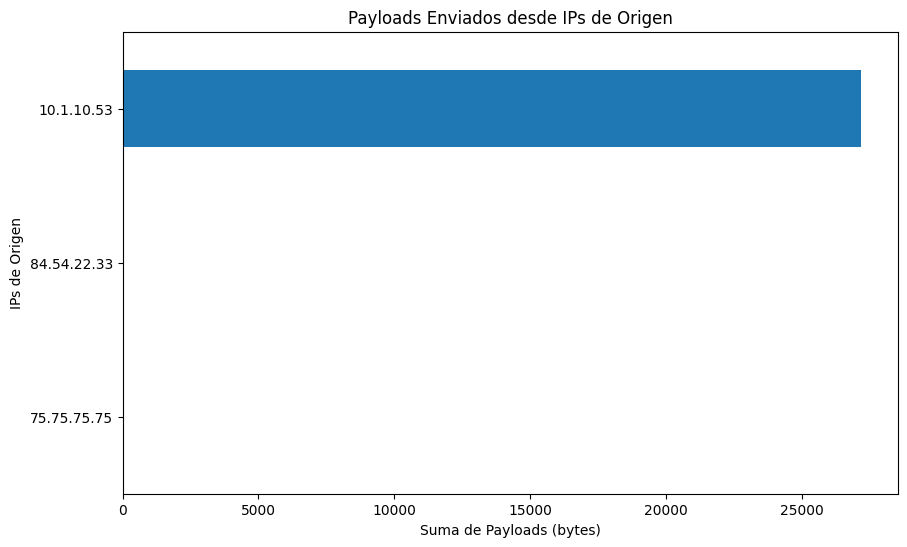

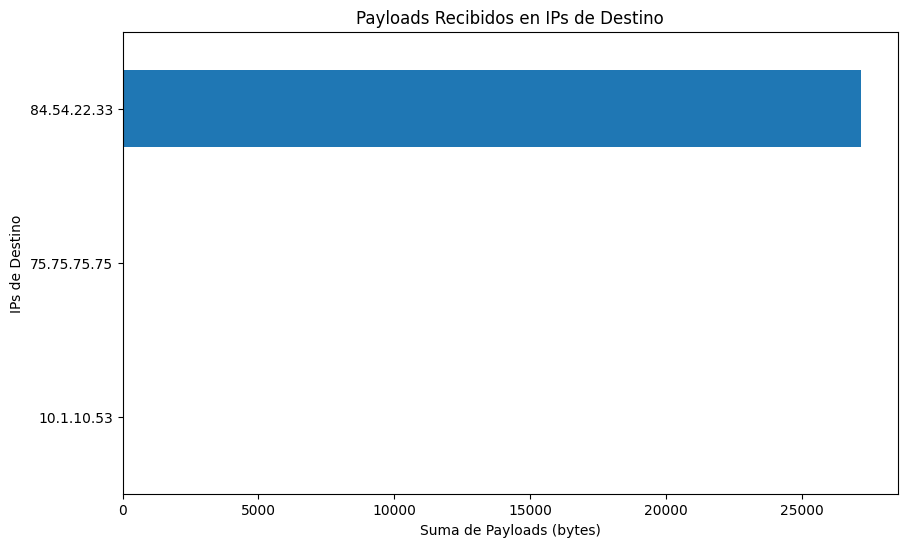

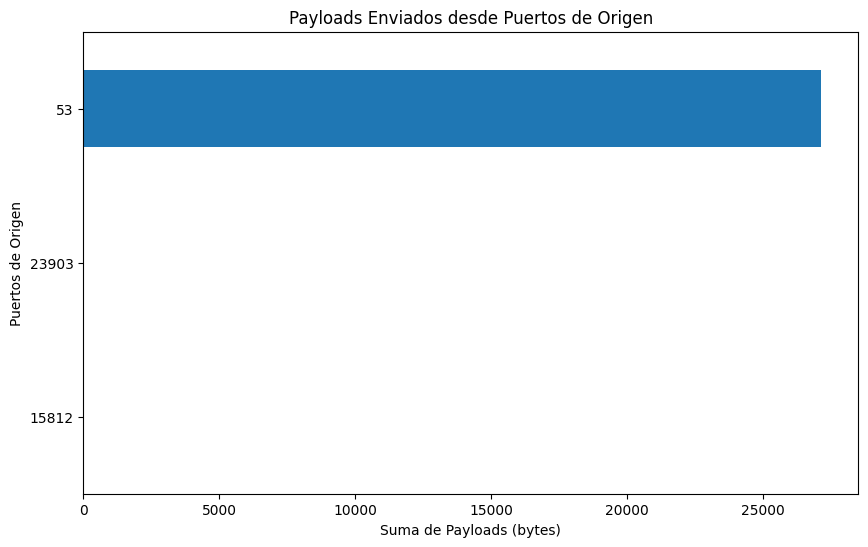

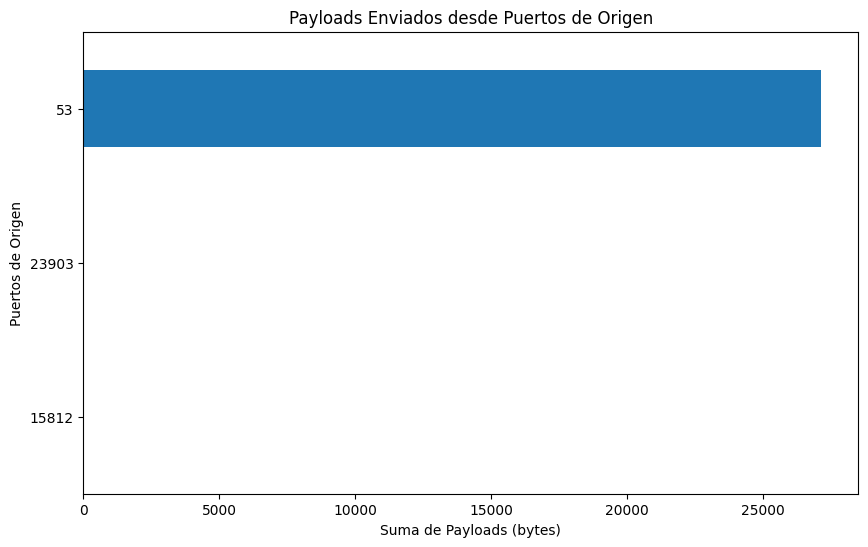

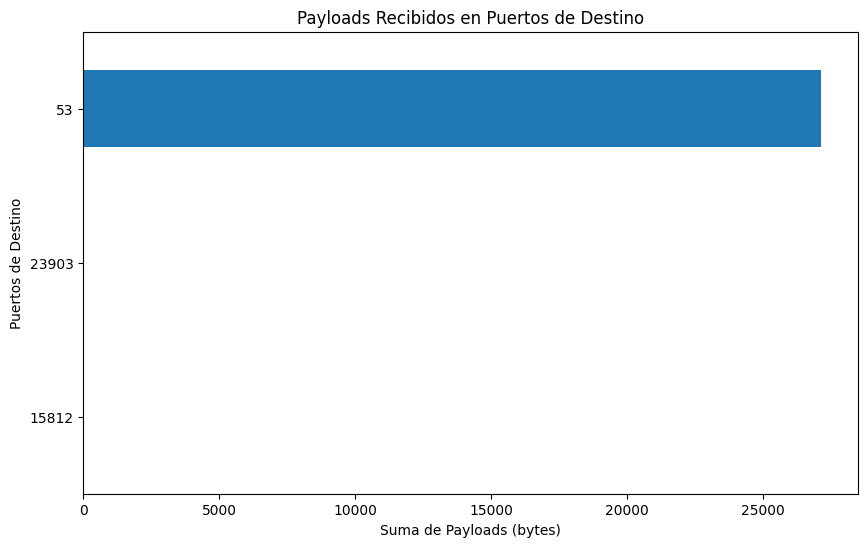

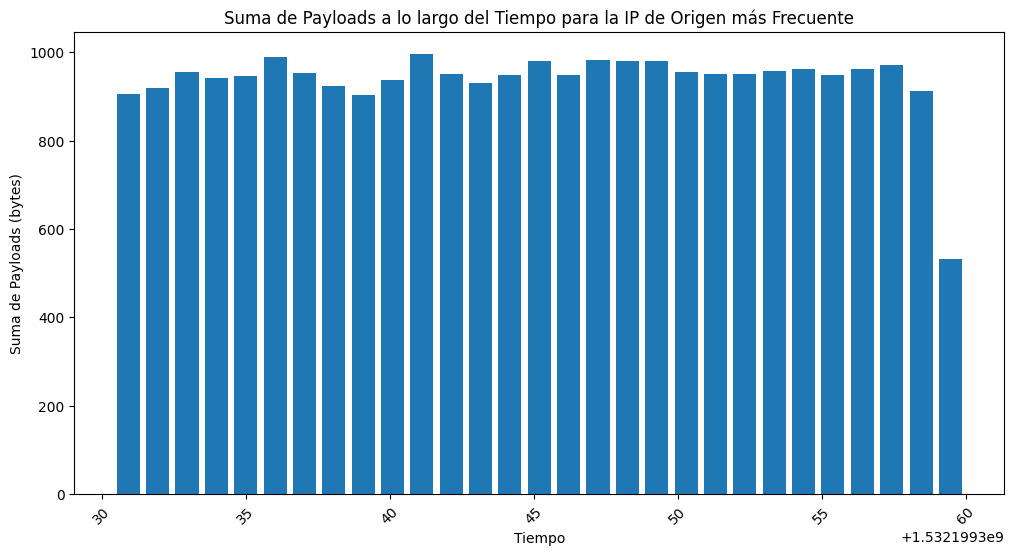

In [6]:
import matplotlib.pyplot as plt

payloads_enviados_por_ip = datos.groupby('Src Address')['Payload'].sum()
payloads_recibidos_por_ip = datos.groupby('Dst Address')['Payload'].sum()
payloads_enviados_por_puerto = datos.groupby('Src Port')['Payload'].sum()

plt.figure(figsize=(10, 6))
payloads_enviados_por_ip.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs de Origen')
plt.title('Payloads Enviados desde IPs de Origen')
plt.show()

plt.figure(figsize=(10, 6))
payloads_recibidos_por_ip.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('IPs de Destino')
plt.title('Payloads Recibidos en IPs de Destino')
plt.show()

plt.figure(figsize=(10, 6))
payloads_enviados_por_puerto.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos de Origen')
plt.title('Payloads Enviados desde Puertos de Origen')
plt.show()


payloads_enviados_por_puerto = datos.groupby('Src Port')['Payload'].sum()
payloads_recibidos_por_puerto = datos.groupby('Dst Port')['Payload'].sum()
ip_mas_frecuente = datos['Src Address'].mode()[0]
datos_ip_mas_frecuente = datos[datos['Src Address'] == ip_mas_frecuente]

plt.figure(figsize=(10, 6))
payloads_enviados_por_puerto.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos de Origen')
plt.title('Payloads Enviados desde Puertos de Origen')
plt.show()

plt.figure(figsize=(10, 6))
payloads_recibidos_por_puerto.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Suma de Payloads (bytes)')
plt.ylabel('Puertos de Destino')
plt.title('Payloads Recibidos en Puertos de Destino')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(datos_ip_mas_frecuente['Time'], datos_ip_mas_frecuente['Payload'])
plt.xlabel('Tiempo')
plt.ylabel('Suma de Payloads (bytes)')
plt.title('Suma de Payloads a lo largo del Tiempo para la IP de Origen más Frecuente')
plt.xticks(rotation=45)
plt.show()


### 7. Investigación del payload

a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente.

b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y
agrúpelas por dst y la suma del payload,

c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta
IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.

f. Muestre el contenido del array.

g. Observe los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido
que se envíe al puerto destino? Describa lo que encontró.

Tras revisar los primeros bytes del contenido enviado al puerto destino, no se identificaron anomalías evidentes o datos inapropiados. Es crucial reconocer que este análisis preliminar podría no ser suficiente para una evaluación completa del tráfico. Se requeriría una investigación más detallada para comprender mejor la naturaleza de los datos y su relación con el servicio o aplicación asociada al puerto destino.


In [8]:
# Paso a: Filtrar el DataFrame original para incluir solo las conexiones con la IP origen más frecuente
df_ip_mas_frecuente = datos[datos['Src Address'] == ip_mas_frecuente].copy()

# Paso b: Crear un nuevo DataFrame agrupando por IP destino y sumando los payloads
df_agrupado = df_ip_mas_frecuente.groupby('Dst Address')['Payload'].sum().reset_index()

# Paso c: Obtener la IP destino que más ha intercambiado bytes con la IP más frecuente
ip_sospechosa = df_agrupado.loc[df_agrupado['Payload'].idxmax()]['Dst Address']

# Paso d: Filtrar el DataFrame original para incluir solo la conversación entre la IP más frecuente y la IP sospechosa
df_conversacion_sospechosa = datos[(datos['Src Address'] == ip_mas_frecuente) & (datos['Dst Address'] == ip_sospechosa)].copy()

# Paso e: Obtener los payloads del DataFrame y añadirlos en un array
payloads_conversacion_sospechosa = df_conversacion_sospechosa['Payload'].to_list()

# Paso f: Mostrar el contenido del array de payloads
print("Contenido del array de payloads:")
print(payloads_conversacion_sospechosa)



Contenido del array de payloads:
[905, 919, 956, 942, 947, 989, 952, 923, 903, 936, 995, 950, 930, 948, 981, 948, 983, 981, 979, 954, 950, 950, 957, 963, 949, 961, 971, 913, 532]
